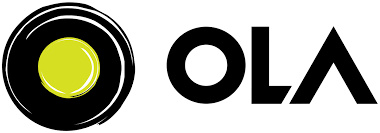

### `Problem Statement:`

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)
- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

### `Column Profiling:`

1. MMMM-YY : Reporting Date (Monthly)
2 .Driver_ID : Unique id for drivers
3. Age : Age of the driver
4. Gender : Gender of the driver – Male : 0, Female: 1
5. City : City Code of the driver
6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. Income : Monthly average Income of the driver
8. Date Of Joining : Joining date for the driver
9. LastWorkingDate : Last date of working for the driver
10. Joining Designation : Designation of the driver at the time of joining
11. Grade : Grade of the driver at the time of reporting
12. Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13. Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")                     #hide warnings

from colored import fg

In [2]:
#importing data
df = pd.read_csv("C:/Users/Rajeshri Jogi/Desktop/PROJECTS/Scaler/11. Ensemble Techniques_OLA/ola_driver_scaler.csv")

In [3]:
#checking the data
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [4]:
#all the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
#drop the unwanted column 
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
#check the statistics of the data
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [7]:
#converting the column name to lowercase
df.columns = [x.lower() for x in df.columns]

In [8]:
#check column names
df.columns

Index(['mmm-yy', 'driver_id', 'age', 'gender', 'city', 'education_level',
       'income', 'dateofjoining', 'lastworkingdate', 'joining designation',
       'grade', 'total business value', 'quarterly rating'],
      dtype='object')

In [9]:
#check the no of unique values in driver id
df.driver_id.nunique()

2381

In [10]:
#change the data type to datetime format
df['mmm-yy'] = pd.to_datetime(df['mmm-yy'])
df['dateofjoining'] = pd.to_datetime(df['dateofjoining'])
df['lastworkingdate'] = pd.to_datetime(df['lastworkingdate'])

In [11]:
#extracting only the month and year 
df['mmm-yy'] = df['mmm-yy'].apply(lambda x: x.strftime('%B-%Y'))

In [12]:
#check the data
df.head()

,mmm-yy,driver_id,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining designation,grade,total business value,quarterly rating
0,January-2019,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,February-2019,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,March-2019,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,November-2020,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,December-2020,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


## `Treating the missing values:`


In [13]:
#get the perenatge of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [14]:
missing_value_df

,column_name,percent_missing
mmm-yy,mmm-yy,0.000000
driver_id,driver_id,0.000000
city,city,0.000000
education_level,education_level,0.000000
income,income,0.000000
dateofjoining,dateofjoining,0.000000
joining designation,joining designation,0.000000
grade,grade,0.000000
total business value,total business value,0.000000
quarterly rating,quarterly rating,0.000000


In [15]:
numerics = ['driver_id', 'age', 'gender', 'education_level',
       'income', 'joining designation',
       'grade', 'total business value', 'quarterly rating']

In [16]:
df[numerics]

,driver_id,age,gender,education_level,income,joining designation,grade,total business value,quarterly rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,2,70254,2,2,740280,3
19100,2788,30.0,0.0,2,70254,2,2,448370,3
19101,2788,30.0,0.0,2,70254,2,2,0,2
19102,2788,30.0,0.0,2,70254,2,2,200420,2


## `KNN Imputation:`

In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_num = pd.DataFrame(imputer.fit_transform(df[numerics]))
df_num.head()

,0,1,2,3,4,5,6,7,8
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [18]:
df_num.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [19]:
df_num = df_num.rename(columns = {0:'driver_id',1:'age', 2:'gender', 3:'education_level',
       4:'income',5:'joining designation',
       6:'grade', 7:'total business value',8:'quarterly rating'})
df_num.head()

,driver_id,age,gender,education_level,income,joining designation,grade,total business value,quarterly rating
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [20]:
df.drop(['driver_id', 'age', 'gender', 'education_level',
       'income', 'joining designation',
       'grade', 'total business value', 'quarterly rating'], axis = 1, inplace =True)
df = pd.concat([df,df_num], axis = 1)
df.head()

,mmm-yy,city,dateofjoining,lastworkingdate,driver_id,age,gender,education_level,income,joining designation,grade,total business value,quarterly rating
0,January-2019,C23,2018-12-24,NaT,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,February-2019,C23,2018-12-24,NaT,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,March-2019,C23,2018-12-24,2019-03-11,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,November-2020,C7,2020-11-06,NaT,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,December-2020,C7,2020-11-06,NaT,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [21]:
df.describe(include=[object])

,mmm-yy,city
count,19104,19104
unique,24,29
top,January-2019,C20
freq,1022,1008


## `Merging the rows with same Driver_id`

In [22]:
df.columns

Index(['mmm-yy', 'city', 'dateofjoining', 'lastworkingdate', 'driver_id',
       'age', 'gender', 'education_level', 'income', 'joining designation',
       'grade', 'total business value', 'quarterly rating'],
      dtype='object')

In [23]:
df1 = df.groupby(['driver_id'],as_index=False).agg({'mmm-yy':'last', 'city':'last', 'dateofjoining':'first', 
                                                'lastworkingdate':'last','age':'last', 'gender':'last', 'education_level':'last', 'income':'mean',
                                                   'joining designation':'last','grade':'last', 'total business value':'sum', 'quarterly rating':'last'})

In [24]:
df1 = df1.rename(columns={'income': 'avg_income'})

In [25]:
df1.head()

,driver_id,mmm-yy,city,dateofjoining,lastworkingdate,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating
0,1.0,March-2019,C23,2018-12-24,2019-03-11,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2.0,December-2020,C7,2020-11-06,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
2,4.0,April-2020,C13,2019-12-07,2020-04-27,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5.0,March-2019,C9,2019-01-09,2019-03-07,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6.0,December-2020,C11,2020-07-31,NaT,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0


In [26]:
df1.describe()

,driver_id,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000
mean,1397.559009,33.673457,0.410332,1.00756,59232.460484,1.820244,2.096598,4.586742e+06,1.427971
std,806.161628,5.974767,0.491784,0.81629,28298.214012,0.841433,0.941522,9.127115e+06,0.809839
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1400.000000,33.000000,0.000000,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000
75%,2100.000000,37.000000,1.000000,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000


## `Feature Engineering:`

In [27]:
#new feature of workingdays of the driver
df1['noofworkingdays'] = df1['lastworkingdate'] - df1['dateofjoining']

In [28]:
#dataframe to check the change in income
income = df.groupby(["driver_id"]).agg({'income':[np.ptp,'nunique']})
income['income']['nunique'].value_counts()

1    2337
2      44
Name: nunique, dtype: int64

In [29]:
#new feature to decide if there is an increase in income or not
increaseinincome = []
for i in income['income']['nunique']:
    if i==1:
        increaseinincome.append(0)
    else:
        increaseinincome.append(1)
        
#0 means no increase in income
# 1 means yes increase in income

In [30]:
#append new column in the df1
df1 = df1.assign(increaseinincome = increaseinincome)

In [31]:
#dataframe to check the change in quarterly rating
rating = df.groupby(["driver_id"]).agg({'quarterly rating':[np.ptp,'nunique']})  
rating

quarterly rating        
                       ptp nunique
driver_id                         
1.0                    0.0       1
2.0                    0.0       1
4.0                    0.0       1
5.0                    0.0       1
6.0                    1.0       2
...                    ...     ...
2784.0                 3.0       3
2785.0                 0.0       1
2786.0                 1.0       2
2787.0                 1.0       2
2788.0                 2.0       3

[2381 rows x 2 columns]

In [32]:
rating['quarterly rating']['nunique'].value_counts()

1    1277
2     657
3     356
4      91
Name: nunique, dtype: int64

In [33]:
#new feature to decide if there is an change in rating or not
changeinrating = []
for i in rating['quarterly rating']['nunique']:
    if i==1:
        changeinrating.append(0)
    else:
        changeinrating.append(1)
        
#0 means there is an NO change in rating 
# 1 means there is YES an change in rating 

In [34]:
df1 = df1.assign(changeinrating = changeinrating)

In [35]:
#creating target column from the lastworkingdate column TARGET ENCODING
df1['lastworkingdate'] = df1['lastworkingdate'].astype('object')
target = []
for i in df1['lastworkingdate']:
    if pd.isnull(i):
        target.append(0)
    else:
        target.append(1)

# 0: for still working with ola
# 1: left ola

In [36]:
#append new column with target variables
df1 = df1.assign(target = target)

In [37]:
#drop lastworkingdate column
df1.drop('lastworkingdate', axis = 1, inplace= True)

In [38]:
df1.head()

,driver_id,mmm-yy,city,dateofjoining,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating,noofworkingdays,increaseinincome,changeinrating,target
0,1.0,March-2019,C23,2018-12-24,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,77 days,0,0,1
1,2.0,December-2020,C7,2020-11-06,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,NaT,0,0,0
2,4.0,April-2020,C13,2019-12-07,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,142 days,0,0,1
3,5.0,March-2019,C9,2019-01-09,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,57 days,0,0,1
4,6.0,December-2020,C11,2020-07-31,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,NaT,0,1,0


In [39]:
df1.noofworkingdays

0       77 days
1           NaT
2      142 days
3       57 days
4           NaT
         ...   
2376        NaT
2377    61 days
2378   418 days
2379   334 days
2380        NaT
Name: noofworkingdays, Length: 2381, dtype: timedelta64[ns]

In [40]:
df1['noofworkingdays'] = df1['noofworkingdays'].astype(str).str.replace(' days', '')
df1['noofworkingdays'] = df1['noofworkingdays'].replace('NaT', '3000')
df1['noofworkingdays'] = df1['noofworkingdays'].astype(int)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   driver_id             2381 non-null   float64       
 1   mmm-yy                2381 non-null   object        
 2   city                  2381 non-null   object        
 3   dateofjoining         2381 non-null   datetime64[ns]
 4   age                   2381 non-null   float64       
 5   gender                2381 non-null   float64       
 6   education_level       2381 non-null   float64       
 7   avg_income            2381 non-null   float64       
 8   joining designation   2381 non-null   float64       
 9   grade                 2381 non-null   float64       
 10  total business value  2381 non-null   float64       
 11  quarterly rating      2381 non-null   float64       
 12  noofworkingdays       2381 non-null   int32         
 13  increaseinincome  

In [42]:
df1.head()

,driver_id,mmm-yy,city,dateofjoining,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating,noofworkingdays,increaseinincome,changeinrating,target
0,1.0,March-2019,C23,2018-12-24,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,77,0,0,1
1,2.0,December-2020,C7,2020-11-06,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,3000,0,0,0
2,4.0,April-2020,C13,2019-12-07,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,142,0,0,1
3,5.0,March-2019,C9,2019-01-09,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,57,0,0,1
4,6.0,December-2020,C11,2020-07-31,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,3000,0,1,0


In [43]:
df1.describe()

,driver_id,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating,noofworkingdays,increaseinincome,changeinrating,target
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.673457,0.410332,1.00756,59232.460484,1.820244,2.096598,4.586742e+06,1.427971,1206.568249,0.018480,0.463671,0.678706
std,806.161628,5.974767,0.491784,0.81629,28298.214012,0.841433,0.941522,9.127115e+06,0.809839,1290.077047,0.134706,0.498783,0.467071
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,129.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,368.000000,0.000000,0.000000,1.000000
75%,2100.000000,37.000000,1.000000,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,3000.000000,0.000000,1.000000,1.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,3000.000000,1.000000,1.000000,1.000000


## `Univarite Analysis:`
    

<AxesSubplot:xlabel='count', ylabel='mmm-yy'>

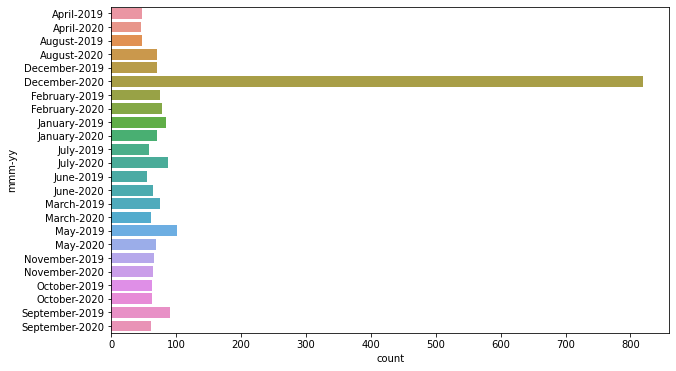

In [44]:
plt.figure(figsize=(10,6))
date = sorted(df1['mmm-yy'].unique().tolist())
sns.countplot(data = df1,y = 'mmm-yy', order = date)

`Inference:`
- Highest records are from December 2020

<AxesSubplot:xlabel='count', ylabel='city'>

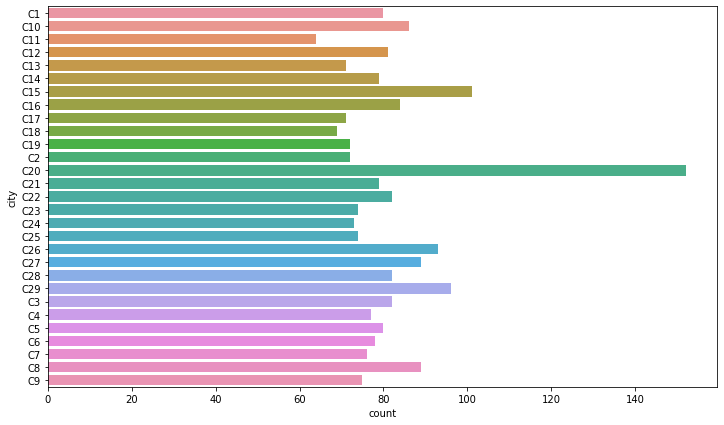

In [45]:
plt.figure(figsize=(12,7))
city = sorted(df1.city.unique().tolist())
sns.countplot(data = df1,y = 'city', order = city)

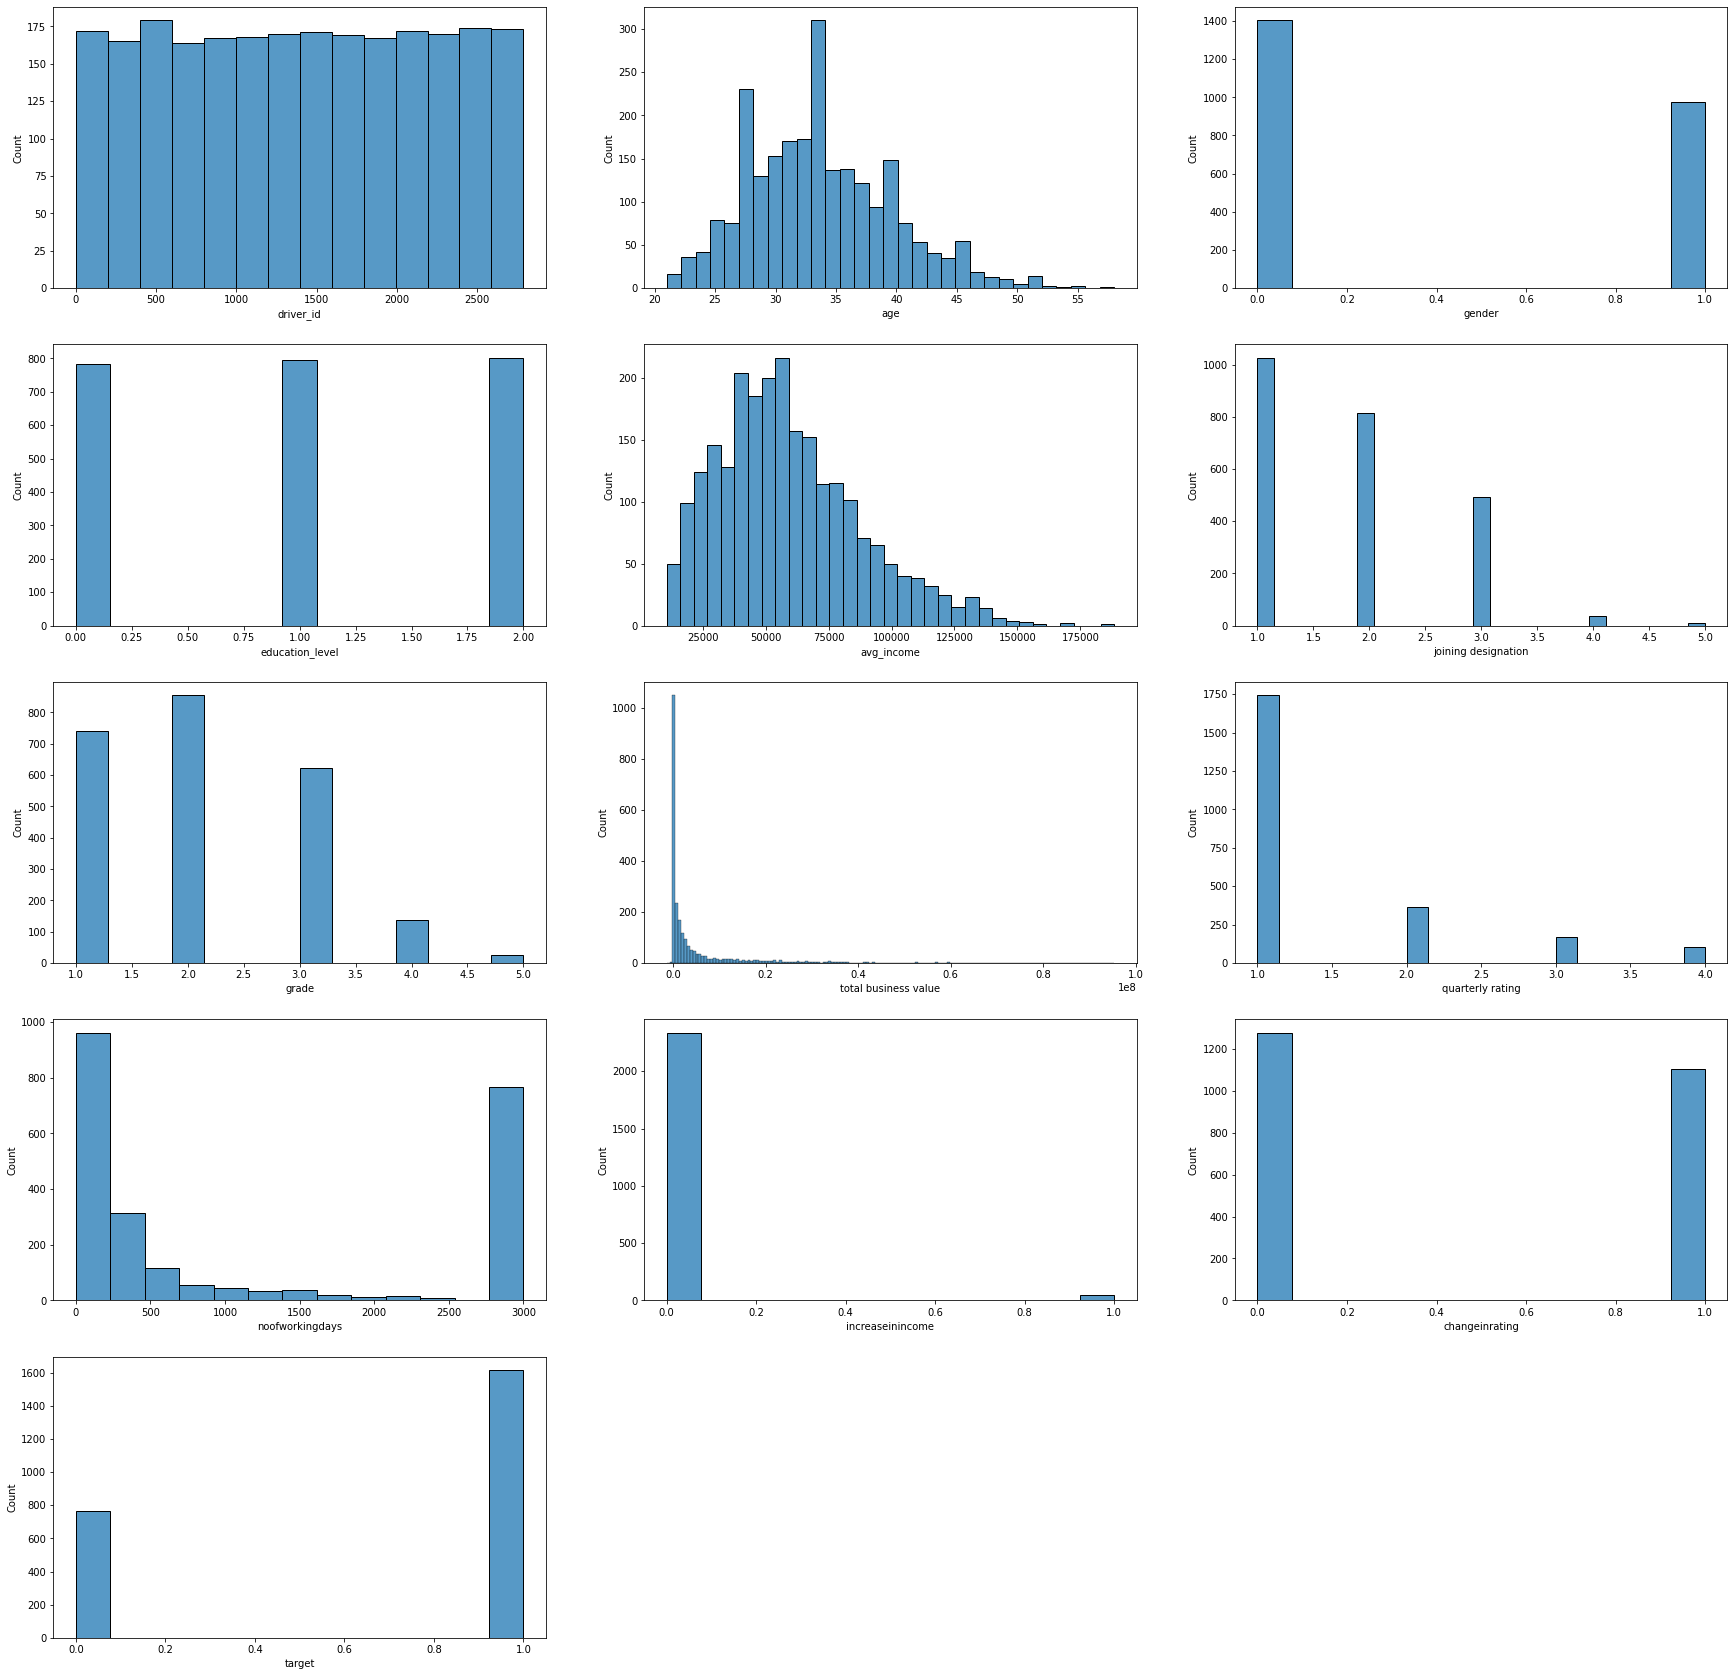

In [46]:
num_cols = ['driver_id', 'age', 'gender',
       'education_level', 'avg_income', 'joining designation', 'grade',
       'total business value', 'quarterly rating', 'noofworkingdays',
       'increaseinincome', 'changeinrating', 'target']
fig = plt.figure(figsize=(30, 30))
for plot in range(1, len(num_cols)+1):
    plt.subplot(5, 3, plot)
    sns.histplot(df1[num_cols[plot-1]])
plt.show()

<AxesSubplot:xlabel='total business value'>

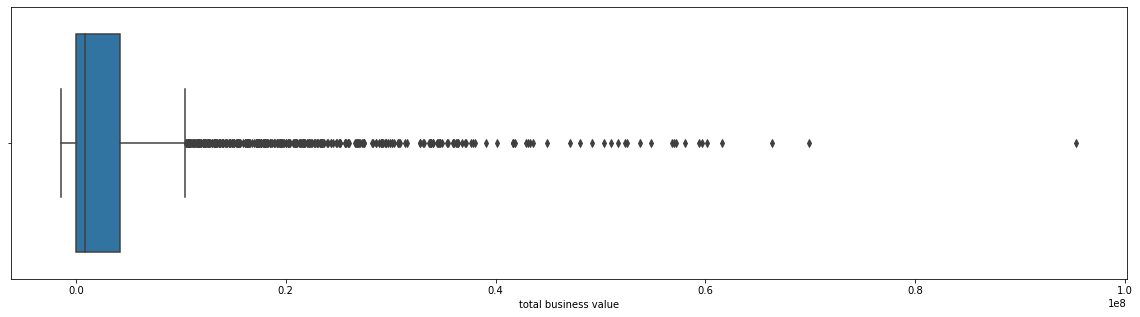

In [47]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df1, x = "total business value")

## `BiVariate Analysis:`

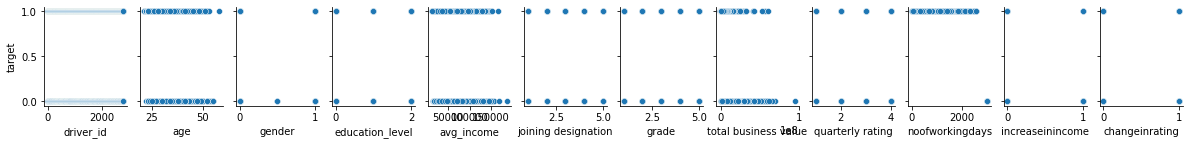

In [48]:
#Visualise the relationship between the features and target using scatterplots
sns.pairplot(df1, x_vars=['driver_id', 'age', 'gender',
       'education_level', 'avg_income', 'joining designation', 'grade',
       'total business value', 'quarterly rating', 'noofworkingdays',
       'increaseinincome', 'changeinrating'],y_vars = 'target',size=2, aspect=0.7, kind='scatter')

<AxesSubplot:xlabel='target', ylabel='total business value'>

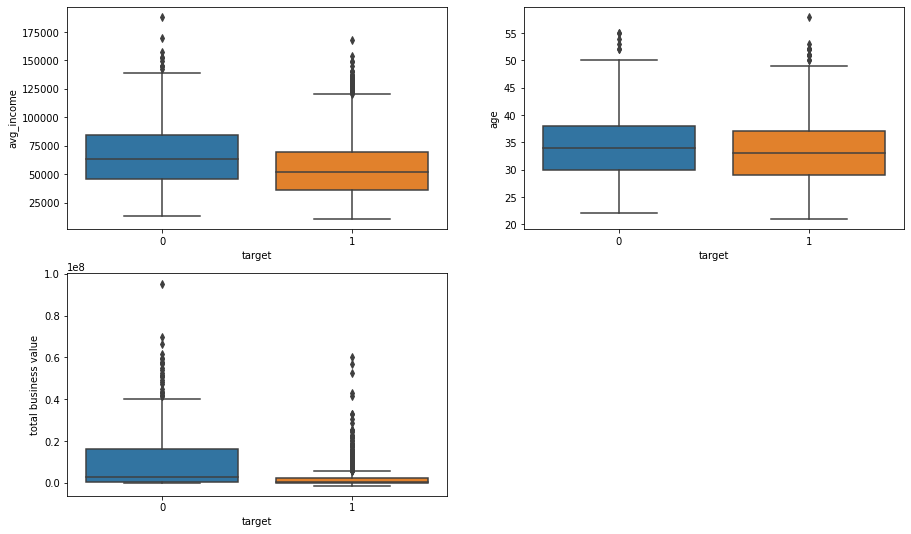

In [49]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.boxplot(data = df1, x = 'target', y= 'avg_income')

plt.subplot(2,2,2)
sns.boxplot(data = df1, x = 'target', y= 'age')

plt.subplot(2,2,3)
sns.boxplot(data = df1, x = 'target', y= 'total business value')

`Inference:`
- There is no linear correlation as such between numerical columns and target variable

In [50]:
df1.target

0       1
1       0
2       1
3       1
4       0
       ..
2376    0
2377    1
2378    1
2379    1
2380    0
Name: target, Length: 2381, dtype: int64

<AxesSubplot:xlabel='city', ylabel='count'>

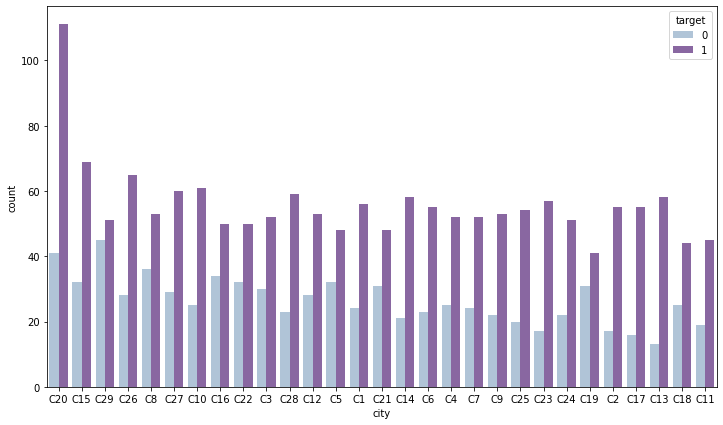

In [51]:
plt.figure(figsize=(12,7))
sns.countplot(x = df1['city'], hue = df1["target"], order = df1['city'].value_counts().index, palette = 'BuPu')

`Inference:`
- City C13 has the highest churn rate compared to other cities.
- City C29 has lowest comparatively to other cities

<AxesSubplot:xlabel='gender', ylabel='count'>

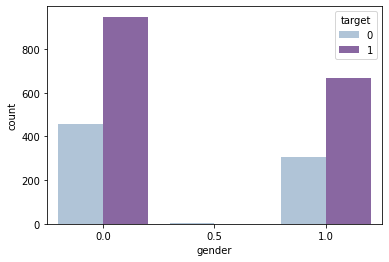

In [52]:
sns.countplot(x = df1['gender'], hue = df1["target"], palette = 'BuPu')

In [53]:
pd.crosstab(df1['gender'], df1['target'], normalize = True)

target,0,1
gender,,
0.0,0.191096,0.398152
0.5,0.000840,0.000000
1.0,0.129357,0.280554


In [54]:
df1.columns

Index(['driver_id', 'mmm-yy', 'city', 'dateofjoining', 'age', 'gender',
       'education_level', 'avg_income', 'joining designation', 'grade',
       'total business value', 'quarterly rating', 'noofworkingdays',
       'increaseinincome', 'changeinrating', 'target'],
      dtype='object')

<AxesSubplot:xlabel='quarterly rating', ylabel='count'>

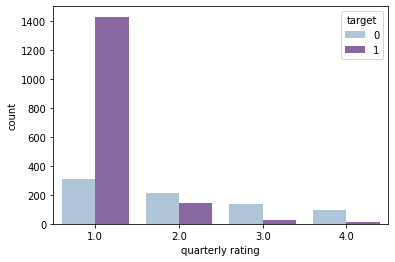

In [55]:
sns.countplot(x = df1['quarterly rating'], hue = df1["target"], palette = 'BuPu')

In [56]:
pd.crosstab(df1['quarterly rating'], df1['target'], normalize = True)

target,0,1
quarterly rating,,
1.0,0.131037,0.601428
2.0,0.090718,0.061319
3.0,0.058799,0.011760
4.0,0.040739,0.004200


<AxesSubplot:xlabel='joining designation', ylabel='count'>

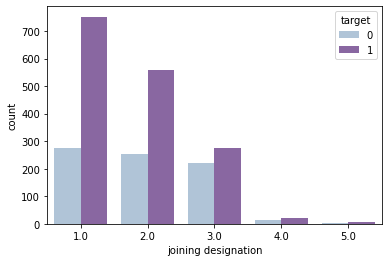

In [57]:
sns.countplot(x = df1['joining designation'], hue = df1["target"], palette = 'BuPu')

In [58]:
pd.crosstab(df1['joining designation'], df1['target'], normalize = True)

target,0,1
joining designation,,
1.0,0.115078,0.315834
2.0,0.107098,0.235195
3.0,0.091978,0.115078
4.0,0.005880,0.009240
5.0,0.001260,0.003360


<AxesSubplot:xlabel='education_level', ylabel='count'>

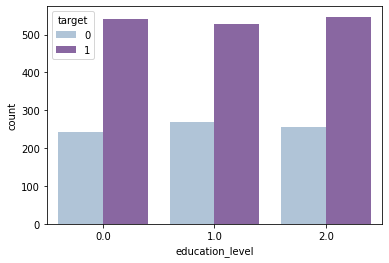

In [59]:
sns.countplot(x = df1['education_level'], hue = df1["target"], palette = 'BuPu')

In [60]:
pd.crosstab(df1['education_level'], df1['target'], normalize = True)

target,0,1
education_level,,
0.0,0.101638,0.227635
1.0,0.112558,0.221336
2.0,0.107098,0.229735


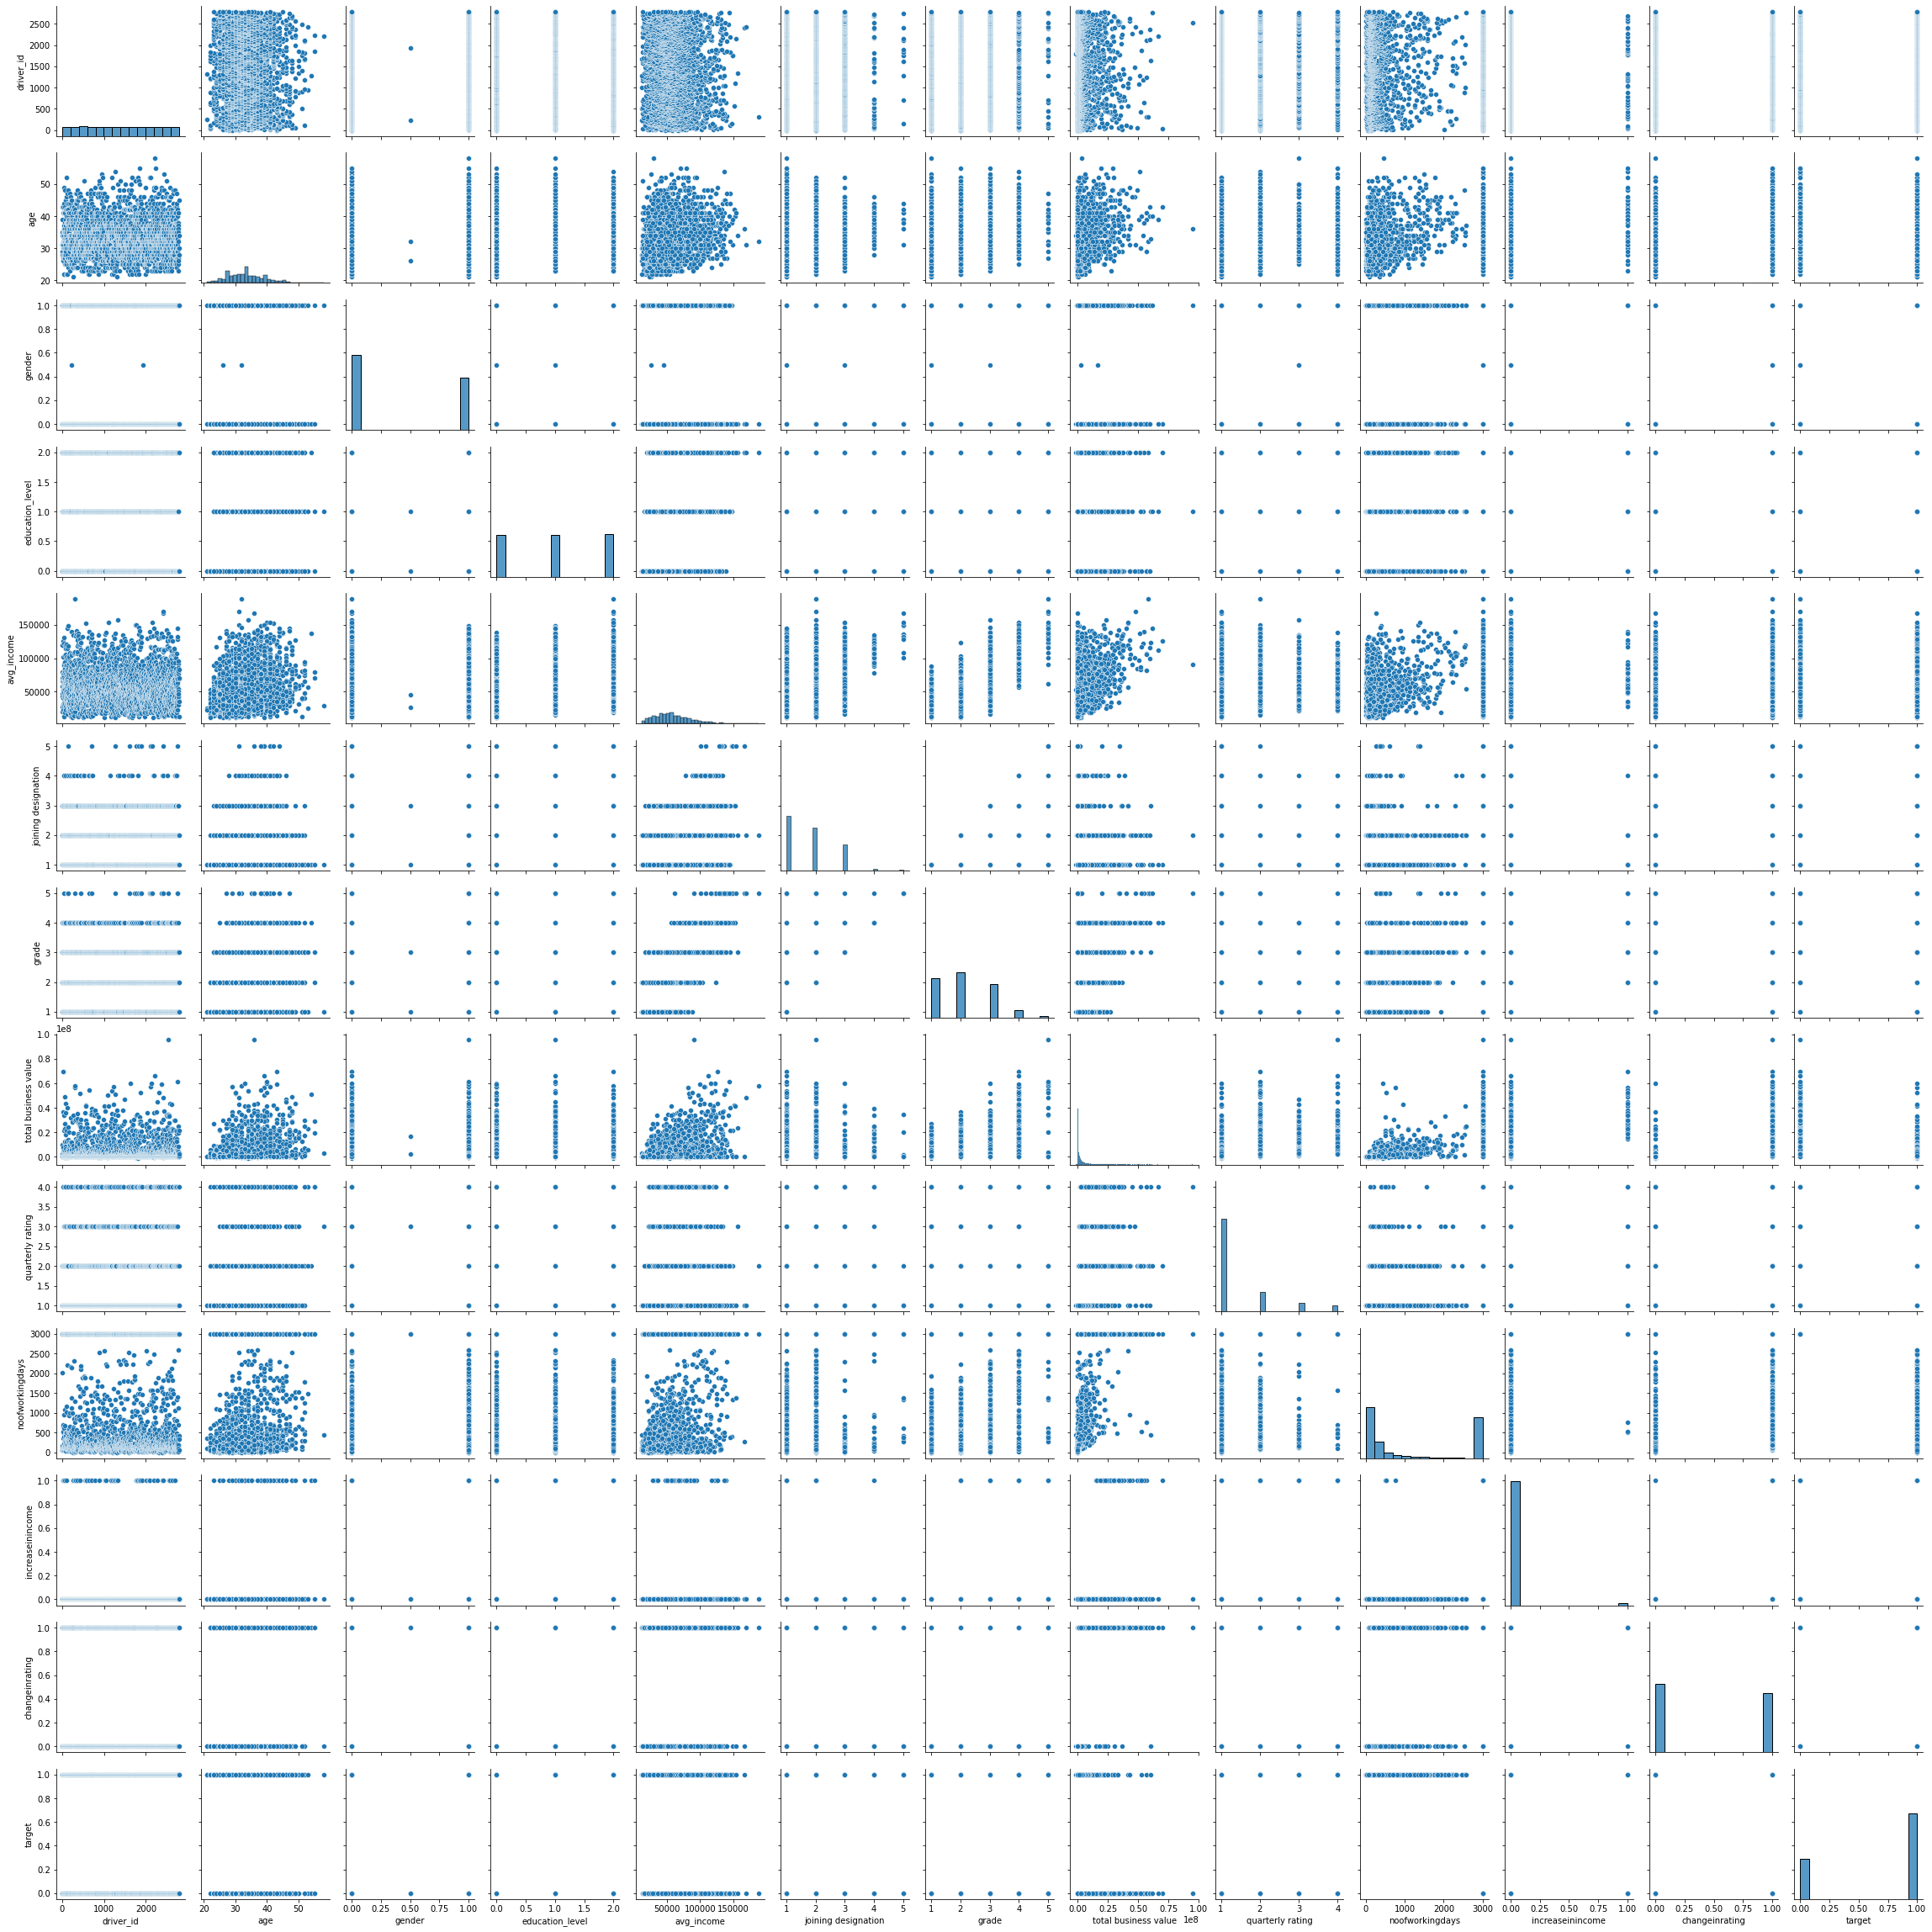

In [61]:
sns.pairplot(df1)

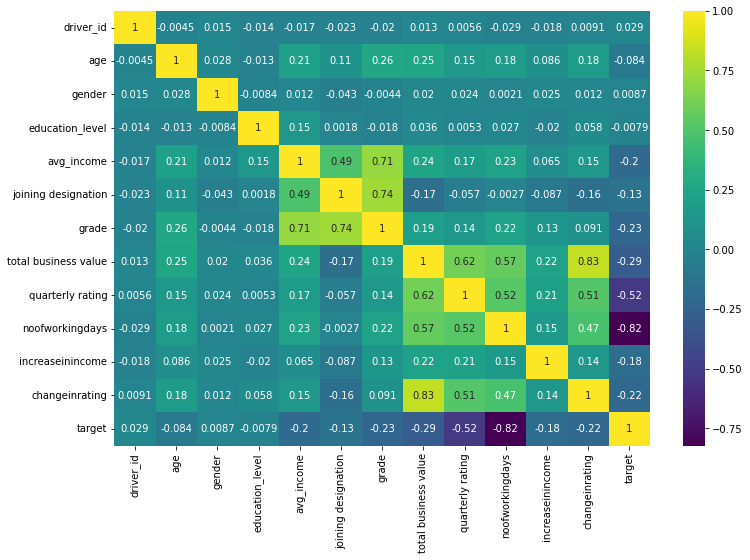

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

In [63]:
df1.columns

Index(['driver_id', 'mmm-yy', 'city', 'dateofjoining', 'age', 'gender',
       'education_level', 'avg_income', 'joining designation', 'grade',
       'total business value', 'quarterly rating', 'noofworkingdays',
       'increaseinincome', 'changeinrating', 'target'],
      dtype='object')

<AxesSubplot:xlabel='noofworkingdays', ylabel='avg_income'>

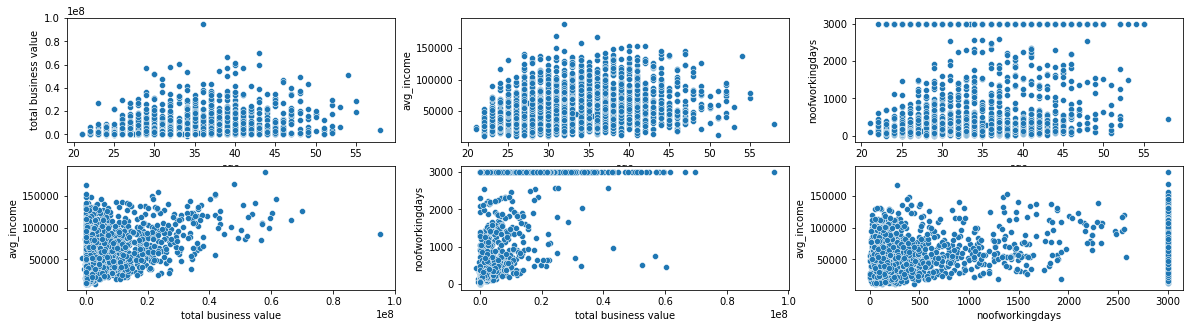

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(2,3,1)
sns.scatterplot(data = df1, x= 'age', y = 'total business value')

plt.subplot(2,3,2)
sns.scatterplot(data = df1, x= 'age', y = 'avg_income')

plt.subplot(2,3,3)
sns.scatterplot(data = df1, x= 'age', y = 'noofworkingdays')

plt.subplot(2,3,4)
sns.scatterplot(data = df1, y= 'avg_income', x = 'total business value')

plt.subplot(2,3,5)
sns.scatterplot(data = df1, y= 'noofworkingdays', x = 'total business value')

plt.subplot(2,3,6)
sns.scatterplot(data = df1, x= 'noofworkingdays', y = 'avg_income')

## `Outlier Treatment:`

In [65]:
#detecting outliers
def detect_outliers(df,col):
    q1 = np.quantile(df[col],0.15)
    q3 = np.quantile(df[col],0.85)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    outlier = df.loc[(df[col] < lb) | (df[col] > ub)]
    return np.round(outlier.shape[0]/df.shape[0]*100)

In [66]:
#print outliers for all numerical columns
print(f'Outliers percentages')
#print(f"Loan Amount = {detect_outliers(df,'loan_amnt')}%")
print(f"avg_income                       = {detect_outliers(df1, 'avg_income')}%")
print(f"total business value             = {detect_outliers(df1, 'total business value')}%")

Outliers percentages
avg_income                       = 0.0%
total business value             = 5.0%


In [67]:
#Outliers Treatment
def print_outliers(df, col):
    q1 = np.quantile(df[col],0.15)
    q3 = np.quantile(df[col],0.85)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    print(f'Lower bound: {lb.round(2)}')
    print(f'Upper bound: {ub.round(2)}')
    return df.loc[(df[col] < lb) | (df[col] > ub)]

In [68]:
# print_outliers(df1, 'avg_income')

In [69]:
#imputing outlier
# df1.loc[(df1["avg_income"]>130931.5), "avg_income"] = 130931.5

In [70]:
print_outliers(df1, 'total business value')

Lower bound: -14116800.0
Upper bound: 23528000.0


,driver_id,mmm-yy,city,dateofjoining,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating,noofworkingdays,increaseinincome,changeinrating,target
17,25.0,December-2020,C24,2017-10-30,31.0,0.0,1.0,102077.000000,1.0,3.0,36351110.0,4.0,3000,0,1,0
18,26.0,December-2020,C14,2018-05-07,43.0,0.0,2.0,126132.333333,1.0,4.0,69867900.0,2.0,3000,1,1,0
40,54.0,December-2020,C29,2019-07-11,35.0,0.0,1.0,121816.944444,4.0,5.0,33823290.0,1.0,3000,1,1,0
46,60.0,December-2020,C20,2016-09-17,48.0,1.0,0.0,83992.500000,1.0,4.0,49225520.0,2.0,3000,1,1,0
54,68.0,December-2020,C29,2015-10-18,32.0,0.0,0.0,79288.000000,1.0,3.0,27309820.0,3.0,3000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2615.0,December-2020,C29,2015-09-24,31.0,0.0,2.0,98935.000000,1.0,4.0,42883990.0,3.0,3000,0,1,0
2277,2668.0,December-2020,C16,2014-12-27,35.0,0.0,0.0,112112.000000,2.0,4.0,30121900.0,1.0,3000,0,1,0
2293,2690.0,December-2020,C11,2018-07-17,26.0,0.0,2.0,78632.750000,1.0,3.0,29475240.0,4.0,3000,1,1,0
2351,2753.0,December-2020,C11,2013-07-08,40.0,1.0,1.0,144726.000000,1.0,5.0,61583040.0,2.0,3000,0,1,0


In [71]:
#imputing outlier
df1.loc[(df1["total business value"]>23528000.0), "total business value"] = 23528000.0

In [72]:
df1.describe()

,driver_id,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating,noofworkingdays,increaseinincome,changeinrating,target
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.673457,0.410332,1.00756,59232.460484,1.820244,2.096598,3.951737e+06,1.427971,1206.568249,0.018480,0.463671,0.678706
std,806.161628,5.974767,0.491784,0.81629,28298.214012,0.841433,0.941522,6.608211e+06,0.809839,1290.077047,0.134706,0.498783,0.467071
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,129.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,368.000000,0.000000,0.000000,1.000000
75%,2100.000000,37.000000,1.000000,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,3000.000000,0.000000,1.000000,1.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,2.352800e+07,4.000000,3000.000000,1.000000,1.000000,1.000000


In [73]:
df1.head()

,driver_id,mmm-yy,city,dateofjoining,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating,noofworkingdays,increaseinincome,changeinrating,target
0,1.0,March-2019,C23,2018-12-24,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,77,0,0,1
1,2.0,December-2020,C7,2020-11-06,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,3000,0,0,0
2,4.0,April-2020,C13,2019-12-07,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,142,0,0,1
3,5.0,March-2019,C9,2019-01-09,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,57,0,0,1
4,6.0,December-2020,C11,2020-07-31,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,3000,0,1,0


## `Encoding:`

In [74]:
# Dropping some variables which IMO we can let go for now -
df1.drop(['dateofjoining','driver_id', 'mmm-yy'], axis =1, inplace = True )

In [75]:
df1.city.value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: city, dtype: int64

In [76]:
#target encoding for the columns which are discrete in nature
from category_encoders import TargetEncoder
te = TargetEncoder()

df1['city'] = te.fit_transform(df1['city'], df1['target'])

In [77]:
df1.head()

,city,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating,noofworkingdays,increaseinincome,changeinrating,target
0,0.769859,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,77,0,0,1
1,0.684190,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,3000,0,0,0
2,0.816064,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,142,0,0,1
3,0.706553,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,57,0,0,1
4,0.702829,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,3000,0,1,0


<AxesSubplot:>

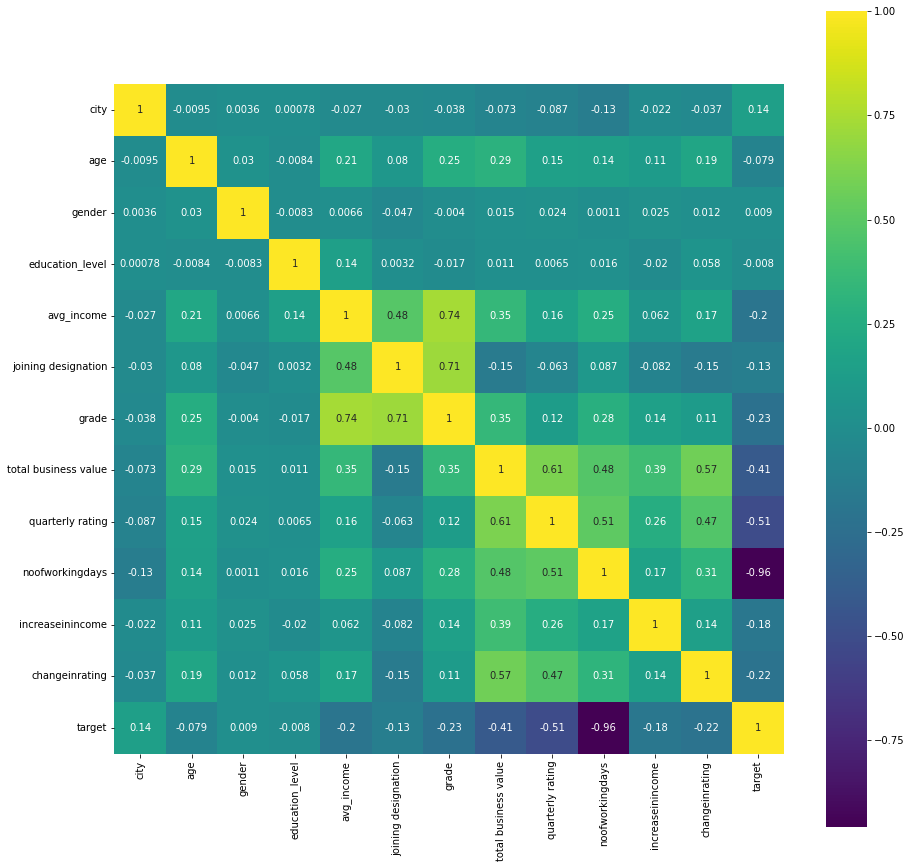

In [78]:
#check the correlation
plt.figure(figsize=(15, 15))
sns.heatmap(df1.corr(method='pearson'), square=True,annot=True, cmap='viridis')

## `Data Preparation for Modeling:`

In [79]:
df1.head()

,city,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating,noofworkingdays,increaseinincome,changeinrating,target
0,0.769859,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,77,0,0,1
1,0.684190,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,3000,0,0,0
2,0.816064,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,142,0,0,1
3,0.706553,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,57,0,0,1
4,0.702829,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,3000,0,1,0


In [80]:
df1.shape

(2381, 13)

In [81]:
df2 = df1.drop('noofworkingdays', axis = 1)

In [82]:
df2.shape

(2381, 12)

In [83]:
df2['target'].value_counts()

1    1616
0     765
Name: target, dtype: int64

In [84]:
#preparing data for modeling
X = df2.drop('target', axis=1)
y = df2['target']

In [85]:
X

,city,age,gender,education_level,avg_income,joining designation,grade,total business value,quarterly rating,increaseinincome,changeinrating
0,0.769859,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0
1,0.684190,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,0,0
2,0.816064,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0
3,0.706553,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,0,0
4,0.702829,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2376,0.698531,34.0,0.0,0.0,82815.0,2.0,3.0,21748820.0,4.0,0,1
2377,0.706553,34.0,1.0,0.0,12105.0,1.0,1.0,0.0,1.0,0,0
2378,0.570044,45.0,0.0,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,1
2379,0.730263,28.0,1.0,2.0,69498.0,1.0,1.0,977830.0,1.0,0,1


### Train-Test Split:

In [86]:
#split the data for further modeling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    stratify=y, random_state=42)

In [87]:
print(X_train.shape)
print(X_test.shape)

(1904, 11)
(477, 11)


## `Decision Tree Classifier:`

In [88]:
#building the model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
y_pred = tree_clf.predict(X_test)
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [90]:
print("Training acc:", tree_clf.score(X_train, y_train))
print("Testing acc:", tree_clf.score(X_test, y_test))

Training acc: 1.0
Testing acc: 0.7023060796645703


In [91]:
#crossvalidation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(tree_clf, X_train, y_train, scoring = 'accuracy', cv=10)

In [92]:
# validation accuracy
accuracies.mean()

0.7085505648939101

**Confusion Matrix**

In [93]:
#plot the predictions in confusiomn matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 89  64]
 [ 78 246]]


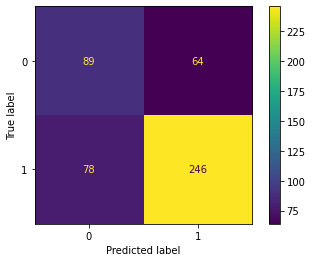

In [94]:
ConfusionMatrixDisplay(cm).plot()

In [95]:
#accuracy from Confusion matrix
accuracy = np.diag(cm).sum()/ cm.sum()
accuracy

0.7023060796645703

In [96]:
#code for precision calculation
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7935483870967742

In [97]:
#code for recall calculation
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7592592592592593

In [98]:
# code for f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred).round(2)

0.78

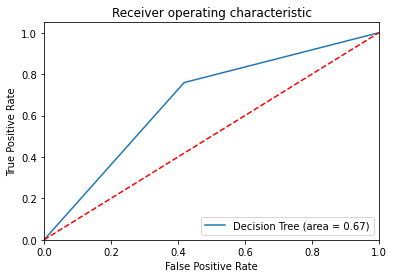

In [99]:
#import roc metric
from sklearn.metrics import roc_curve, roc_auc_score

#get the fpr,tpr and thres for each values
fpr, tpr, thres = roc_curve(y_test, y_pred)

logit_roc_auc = roc_auc_score(y_test, tree_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [100]:
#get the roc_score for the model
roc_auc_score(y_test, y_pred).round(2)

0.67

In [101]:
#overall report for the model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.58      0.56       153
           1       0.79      0.76      0.78       324

    accuracy                           0.70       477
   macro avg       0.66      0.67      0.67       477
weighted avg       0.71      0.70      0.71       477



#### Multicolinearity and Imbalance data might be creating noise, let's treat the data using smote technique and VIF to check the multicoliearity

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

calc_vif(X)[:5]

,Feature,VIF
6,grade,30.82
0,city,30.41
1,age,30.28
5,joining designation,19.20
4,avg_income,13.04


In [103]:
X.drop(columns=['grade'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
0,city,30.37
1,age,29.97
4,avg_income,9.73
5,joining designation,8.94
7,quarterly rating,6.72


In [104]:
X.drop(columns=['city'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
0,age,10.92
3,avg_income,9.66
4,joining designation,8.85
6,quarterly rating,6.39
5,total business value,3.46


In [105]:
X.head()

,age,gender,education_level,avg_income,joining designation,total business value,quarterly rating,increaseinincome,changeinrating
0,28.0,0.0,2.0,57387.0,1.0,1715580.0,2.0,0,0
1,31.0,0.0,2.0,67016.0,2.0,0.0,1.0,0,0
2,43.0,0.0,2.0,65603.0,2.0,350000.0,1.0,0,0
3,29.0,0.0,0.0,46368.0,1.0,120360.0,1.0,0,0
4,31.0,1.0,1.0,78728.0,3.0,1265000.0,2.0,0,1


In [106]:
#check the accuracy by crossvalidation if there is any improvement after dropping the features
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
accuracy = np.mean(cross_val_score(tree_clf, X, y, cv=kfold, scoring='accuracy', n_jobs=-1)) 
print("Cross Validation accuracy: {:.3f}".format(accuracy))

Cross Validation accuracy: 0.718


### Oversampling using SMOTE

In [107]:
#split the data for further modeling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    stratify=y, random_state=42)

In [108]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [109]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2584, 9)
After OverSampling, the shape of train_y: (2584,) 

After OverSampling, counts of label '1': 1292
After OverSampling, counts of label '0': 1292


#### Rechecking by using Decision Tree classifier to check if the accuarcy has increased

In [110]:
# Using the best decision tree model to recheck the accuracy post smote and removing multicolinearity
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = DecisionTreeClassifier(random_state=7, max_depth = 3)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_train_res, y_train_res, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean().round(3)*100}             Validation: {cv_acc_results['test_score'].mean().round(3)*100}")

K-Fold Accuracy Mean: Train: 78.60000000000001             Validation: 78.5


In [111]:
tree_clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [112]:
y_pred = tree_clf.predict(X_test)
y_pred[:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [113]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       153
           1       0.85      0.89      0.87       324

    accuracy                           0.81       477
   macro avg       0.79      0.77      0.78       477
weighted avg       0.81      0.81      0.81       477



## `Bagging Technique: Random Forest Classifier`

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

rf_clf = RandomForestClassifier(random_state=7, max_depth=10, n_estimators=300)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X_train_res, y_train_res, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")


K-Fold Accuracy Mean: Train: 92.8578296766797 Validation: 83.82897848014126
K-Fold Accuracy Std: Train: 0.6209122024380995 Validation: 6.851201534619017


[0.09319927 0.06467535 0.05385907 0.12492825 0.13978093 0.19590239
 0.30406099 0.00258072 0.02101303]


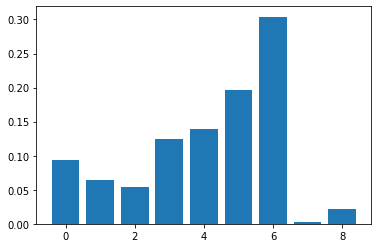

In [115]:
model = rf_clf.fit(X_train_res, y_train_res)
print(model.feature_importances_)

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [116]:
y_pred = rf_clf.predict(X_test)

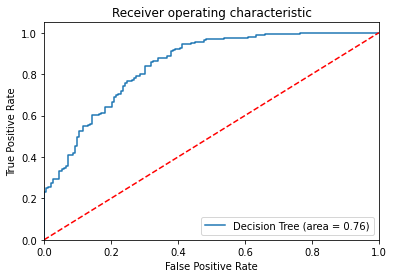

In [117]:
#import roc metric
from sklearn.metrics import roc_curve, roc_auc_score

#get the fpr,tpr and thres for each values
fpr, tpr, thres = roc_curve(y_test, y_pred)

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       153
           1       0.84      0.86      0.85       324

    accuracy                           0.80       477
   macro avg       0.77      0.76      0.77       477
weighted avg       0.80      0.80      0.80       477



In [119]:
#get the roc_score for the model
roc_auc_score(y_test, y_pred).round(2)

0.76

### Grid Search CV:
    

In [120]:
# Defining Parametes
params = {
          'n_estimators' : [300,310,320,330],
          'max_depth' : [11,12,13],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [2,3,4,5]
         }

In [121]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

tuning_function = GridSearchCV(estimator = rf, 
                               param_grid = params,
                               scoring = 'accuracy',
                               cv = 3,
                               n_jobs=-1
                               )

In [122]:
# Now we will fit all combinations
tuning_function.fit(X_train_res, y_train_res)

parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 13, 'max_features': 5, 'n_estimators': 310}
0.8351720557311638


In [123]:
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, bootstrap=True, criterion='entropy', max_depth=13, max_features=2, n_estimators=320)
kfold = KFold(n_splits=15)
cv_acc_results = cross_validate(tree_clf, X_train_res, y_train_res, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 97.2247064598662 Validation: 84.68185688040509
K-Fold Accuracy Std: Train: 0.3445329875878826 Validation: 7.660929476141103


In [124]:
model = tree_clf.fit(X_train_res, y_train_res)

[0.13326588 0.06908483 0.07181952 0.16905973 0.11752756 0.19555664
 0.2165381  0.00326571 0.02388203]


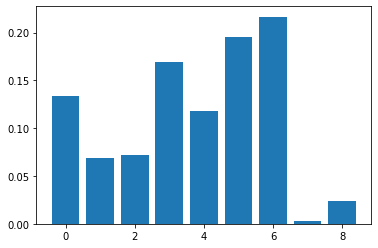

In [125]:
print(model.feature_importances_)

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [126]:
y_pred = model.predict(X_test)

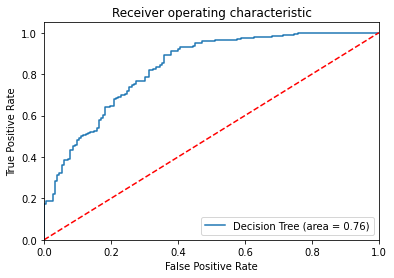

In [127]:
#import roc metric
from sklearn.metrics import roc_curve, roc_auc_score

#get the fpr,tpr and thres for each values
fpr, tpr, thres = roc_curve(y_test, y_pred)

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       153
           1       0.84      0.87      0.85       324

    accuracy                           0.80       477
   macro avg       0.77      0.76      0.76       477
weighted avg       0.79      0.80      0.79       477



In [129]:
#get the roc_score for the model
roc_auc_score(y_test, y_pred).round(2)

0.76

### Random Search CV

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier


params = {'ccp_alpha': uniform(loc=0, scale=0.5)}  # sample from uniform dist between 0 to (0+0.4)=0.4

rf = RandomForestClassifier(random_state=7, bootstrap=True, criterion='entropy', 
                            max_depth=13, max_features=2, n_estimators=320)
tuning_function = RandomizedSearchCV(estimator = rf, 
                               param_distributions = params,  # notice arg changeed from param_grid to param_distributions
                               scoring = 'accuracy',
                               cv = 5,
                               n_iter=20,  # Number of times to run random combination
                               n_jobs=-1
                               )

tuning_function.fit(X_train_res, y_train_res)

parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score) 

{'ccp_alpha': 0.032328716897264576}
0.7701422937939515


## `Boosting Technique: GBDT`

In [131]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
import datetime as dt

start = dt.datetime.now()

model = GBC(n_estimators=150, learning_rate=0.1, max_depth=8, random_state=7, verbose = 1).fit(X_train_res, y_train_res)
end = dt.datetime.now()

print(f"Time taken for training : {end - start}\nTraining accuracy:{model.score(X_train_res, y_train_res)}\nTest Accuracy: {model.score(X_test, y_test)}")

      Iter       Train Loss   Remaining Time 
         1           1.2693            9.36s
         2           1.1727            6.64s
         3           1.0930            5.57s
         4           1.0226            4.99s
         5           0.9610            4.77s
         6           0.9060            4.64s
         7           0.8575            4.58s
         8           0.8120            4.66s
         9           0.7762            4.55s
        10           0.7368            4.47s
        20           0.5097            4.17s
        30           0.4081            3.63s
        40           0.3339            3.23s
        50           0.2805            2.87s
        60           0.2422            2.51s
        70           0.2106            2.18s
        80           0.1791            1.89s
        90           0.1607            1.58s
       100           0.1397            1.30s
Time taken for training : 0:00:03.700105
Training accuracy:1.0
Test Accuracy: 0.7924528301886793


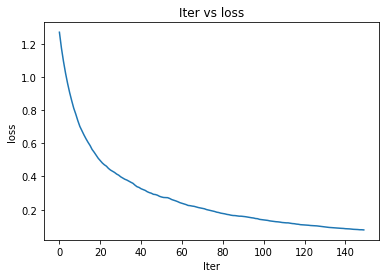

In [132]:
plt.plot(model.train_score_)

plt.xlabel('Iter')
plt.ylabel('loss')
plt.title('Iter vs loss')
plt.show()

[0.08786983 0.03136771 0.03785048 0.17929107 0.15905567 0.17883823
 0.317452   0.00216707 0.00610795]


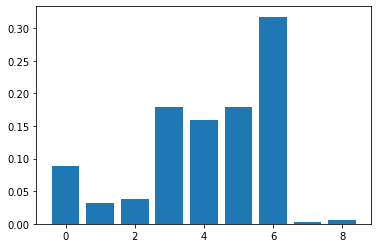

In [133]:
print(model.feature_importances_)

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

## `Boosting Technique: XGBoost`

In [134]:
!pip install xgboost

You should consider upgrading via the 'C:\Users\Rajeshri Jogi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [135]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.4,0.6, 0.8],
        'colsample_bytree': [0.4,0.6, 0.8, 1.0],
        'max_depth': [4, 5,6]
        }
xgb = XGBClassifier(n_estimators=200, objective='multi:softmax', num_class=20, silent=True)

In [136]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_train_res, y_train_res), verbose=3, random_state=1001 )


start = dt.datetime.now()
random_search.fit(X_train_res, y_train_res)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[13:14:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [137]:
print('\nBest hyperparameters:')
print(random_search.best_params_)


Best hyperparameters:
{'subsample': 0.4, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.4}


In [138]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.4, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, silent=True)
best_xgb.fit(X_train_res, y_train_res)

[13:14:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=20,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [139]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_train_res, y_train_res)}\nTest Accuracy: {best_xgb.score(X_test, y_test)}")

Time taken for training : 0:00:45.851220
Training accuracy:0.8858359133126935
Test Accuracy: 0.8134171907756813


[0.04824082 0.10296173 0.0995898  0.0493996  0.16550732 0.06456145
 0.4001229  0.04251053 0.02710586]


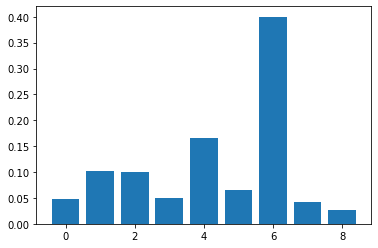

In [140]:
print(best_xgb.feature_importances_)

plt.bar(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_)
plt.show()

In [141]:
X.columns

Index(['age', 'gender', 'education_level', 'avg_income', 'joining designation',
       'total business value', 'quarterly rating', 'increaseinincome',
       'changeinrating'],
      dtype='object')

In [142]:
y_pred = best_xgb.predict(X_test)

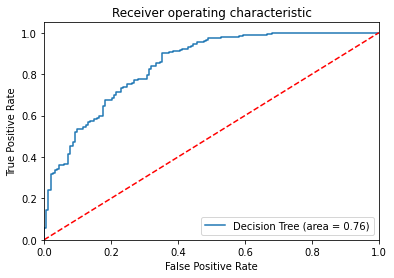

In [143]:
#import roc metric
from sklearn.metrics import roc_curve, roc_auc_score

#get the fpr,tpr and thres for each values
fpr, tpr, thres = roc_curve(y_test, y_pred)

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, best_xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       153
           1       0.83      0.91      0.87       324

    accuracy                           0.81       477
   macro avg       0.80      0.76      0.77       477
weighted avg       0.81      0.81      0.81       477



In [145]:
#get the roc_score for the model
roc_auc_score(y_test, y_pred).round(2)

0.76

# `Insights:`
- The shape of the data is (19104,13)
- The data is for 24 months(2yrs) from Jan 2019 - Dec 2020
- The data consist of 2381 driver's records from 29 cities.
- December 2020 has the highest records in the data
- Highest records are form C20 city, followed by C15 city, C29 city
- Max no.of working days who left the comapny is 2600
- Avg monthly income and total business Value was too low of the driver who left the company
- Proportinately highest churn rate is seen in C13
- Highest correlation is seen between grade and joining designation, then between grade and average income
- Quaterly rating had the most relation with Target (Churn / NOT Churn)
- Quaterly rating and Total business value is highly corelated
- Data is a imbalance data, the proportion of churn and not churn is not Equal.

# `Recommendations:`

#### Most Important Feature is (Descending order)
- Quarterly Rating
- Joining Designation
- Gender
- Education Level
- Total Business Value

#### Percentage affect of the features on Target (Churn Rate):
- 60% churn rate is seen by Driver's with Quarterly Rating - '1.0'
- 40% churn rate is seen Gender - Male
- 32% churn rate is seen by Driver's with Job Designation '1.0'

#### Some suggested steps to reduce the churn rate:
- Create perks and recognition for drivers who's joining designation is 1.0
- Drease in percentage of share may help in retention of the drivers.
- Give training and development to the drivers with low rating
- Steps to help driver increase the rating will help in retaining the predicted 


# END